In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#weather
data_w=pd.read_csv('data/weather_c.csv').values[:,1:]
#scale
sc = MinMaxScaler(feature_range = (0, 1))
data_w_scaled = sc.fit_transform(data_w)

for i in range(data_w.shape[1]):
    fig=plt.figure(figsize=(20,3))
    fig.add_subplot(1,1,1).plot(data_w_scaled[:,i])

#weather2
data_w2_scaled=data_w_scaled[24:]
data_w2_scaled=np.concatenate((data_w2_scaled,np.zeros((24,data_w.shape[1]))),axis=0)
data_w2_scaled.shape

for i in range(data_w.shape[1]):
    fig=plt.figure(figsize=(20,3))
    fig.add_subplot(1,1,1).plot(data_w2_scaled[:,i])

#sun
fnames=pd.read_table('data/names_72.txt',header=None)
fnames=fnames.values[:,0]
fnames= [fn.replace('json','csv') for fn in fnames]

data_al=[]
for fn in fnames:
    tmp=pd.read_csv('data/sun/UR00000126/'+fn[2:]).values[:,2]
    for i in range(24):
        tmpi=np.fromstring(tmp[i], dtype=float, sep=' ')
        tmp[i]=tmpi[0]+tmpi[1]/60.0+tmpi[2]/3600.0
    data_al.append(tmp)
data_al=np.array(data_al)
print(data_al.shape)
#plot
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(data_al.flatten())
#faltten
data_al=data_al.reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)

sc_al = MinMaxScaler(feature_range = (0, 1))
data_al_scaled = sc_al.fit_transform(data_al)
data_al_scaled.shape,np.min(data_al_scaled),np.max(data_al_scaled)

In [10]:
def get_weather(kidx):
    data_w=pd.read_csv('data/weather_c.csv').values[:,1:]#4
    #data_w=np.delete(data_w, [4,6], axis=1)#5,7
    sc = MinMaxScaler(feature_range = (0, 1))
    data_w_scaled = sc.fit_transform(data_w)
    #corrselection
    #idx=[ 6,  8,  3,  7,  0,  9, 10,  2,  4,  1,  5]#;k=6
    data_w_scaled=data_w_scaled[:,kidx]
    #weather_24hourpred
    data_w2_scaled=np.concatenate((data_w_scaled[24:],np.zeros((24,data_w_scaled.shape[1]))),axis=0)
    return np.concatenate((data_w_scaled,data_w2_scaled),axis=-1)
    #return data_w2_scaled#6
    #return data_w_scaled

In [31]:
def get_sun(kidx):
    fnames=pd.read_table('data/names_72.txt',header=None)
    fnames=fnames.values[:,0]
    fnames= [fn.replace('json','csv') for fn in fnames]
    #al
    data_az=[]
    for fn in fnames:
        tmp=pd.read_csv('data/sun/UR00000126/'+fn[2:]).values[:,1]
        for i in range(24):
            tmpi=np.fromstring(tmp[i], dtype=float, sep=' ')
            tmp[i]=tmpi[0]+tmpi[1]/60.0+tmpi[2]/3600.0
            tmp[i]=180-tmp[i]
        data_az.append(tmp)
    data_az=np.array(data_az).reshape((-1,1))
    data_az=data_az.astype('float32')
    #data_az = pd.DataFrame({'방위각_sin': np.sin(np.pi*data_az[:,0]/360),'방위각_cos': np.cos(np.pi*data_az[:,0]/360)})
    data_az = pd.DataFrame({'방위각_cos': np.cos(np.pi*data_az[:,0]/360)})
    data_az=np.array(data_az)
    #al
    data_al=[]
    for fn in fnames:
        tmp=pd.read_csv('data/sun/UR00000126/'+fn[2:]).values[:,2]
        for i in range(24):
            tmpi=np.fromstring(tmp[i], dtype=float, sep=' ')
            tmp[i]=tmpi[0]+tmpi[1]/60.0+tmpi[2]/3600.0
        data_al.append(tmp)
    data_al=np.array(data_al).reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)
    data_al=data_al.astype('float32')
    #data_al = pd.DataFrame({'고도_sin': np.pi*np.sin(data_al[:,0]/90),'고도_cos': np.cos(np.pi*data_al[:,0]/90)})
    data_al = pd.DataFrame({'고도_cos': np.cos(np.pi*data_al[:,0]/90)})
    data_al=np.array(data_al)
    
    sc = MinMaxScaler(feature_range = (0, 1))
    data_al_scaled = sc.fit_transform(data_al)
    sc = MinMaxScaler(feature_range = (0, 1))
    data_az_scaled = sc.fit_transform(data_az)
    return np.concatenate((data_al_scaled,data_az_scaled),axis=-1)[:,kidx]

In [2]:
def get_air():
    data_a=pd.read_csv('data/air_c.csv').values[:,1:]
    sc = MinMaxScaler(feature_range = (0, 1))
    data_a_scaled = sc.fit_transform(data_a)
    return data_a_scaled

In [ ]:
#ra
'''data_ra=[]
for fn in fnames:
    tmp=pd.read_csv('data/sun/UR00000126/'+fn[2:]).values[:,3]
    for i in range(24):
        tmpi=np.fromstring(tmp[i], dtype=float, sep=' ')
        tmp[i]=tmpi[0]+tmpi[1]/60.0+tmpi[2]/3600.0
    data_ra.append(tmp)
data_ra=np.array(data_ra).reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)
#de
data_de=[]
for fn in fnames:
    tmp=pd.read_csv('data/sun/UR00000126/'+fn[2:]).values[:,3]
    for i in range(24):
        tmpi=np.fromstring(tmp[i], dtype=float, sep=' ')
        tmp[i]=tmpi[0]+tmpi[1]/60.0+tmpi[2]/3600.0
    data_de.append(tmp)
data_de=np.array(data_de).reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)

data_sun=np.concatenate((data_al,data_ra,data_de),axis=-1)
sc = MinMaxScaler(feature_range = (0, 1))
data_sun_scaled = sc.fit_transform(data_sun)
return data_sun_scaled[:,:1]'''

/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


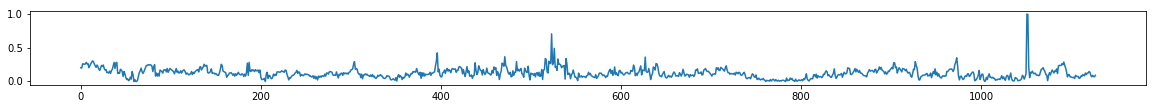

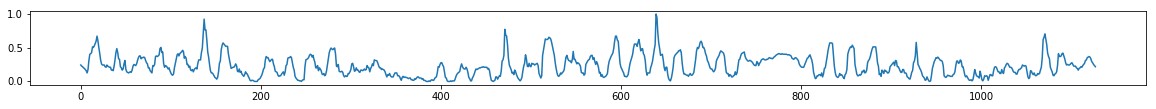

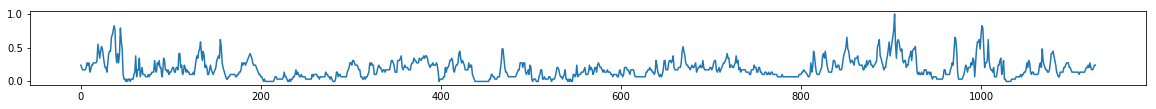

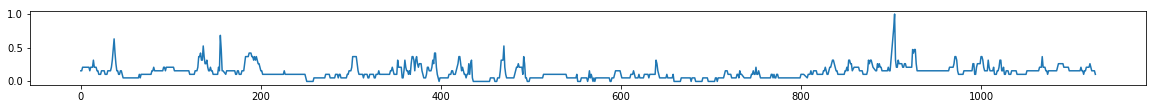

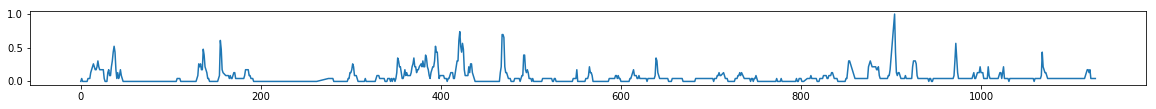

In [17]:
'''a=get_air()
for i in range(a.shape[1]):
    fig=plt.figure(figsize=(20,3))
    fig.add_subplot(2,1,1).plot(a[:,i])
plt.show()'''

/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


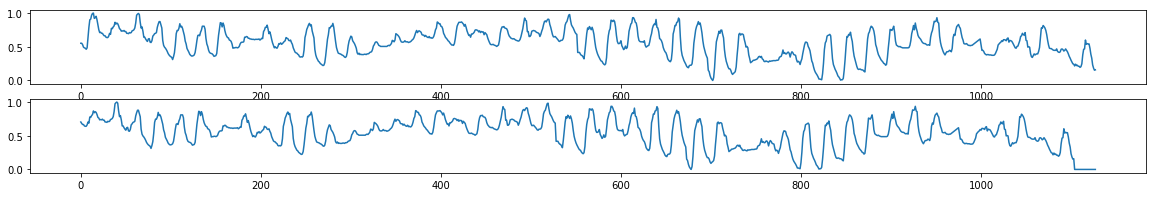

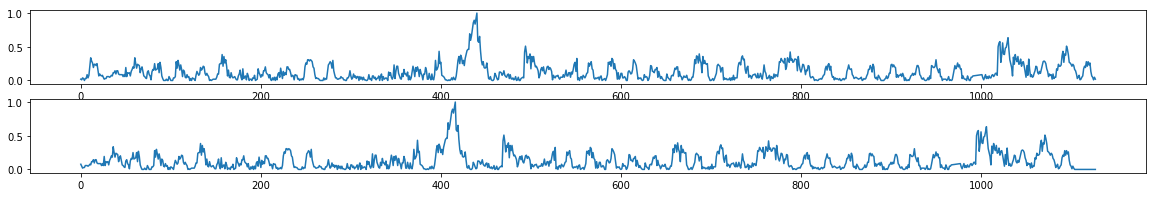

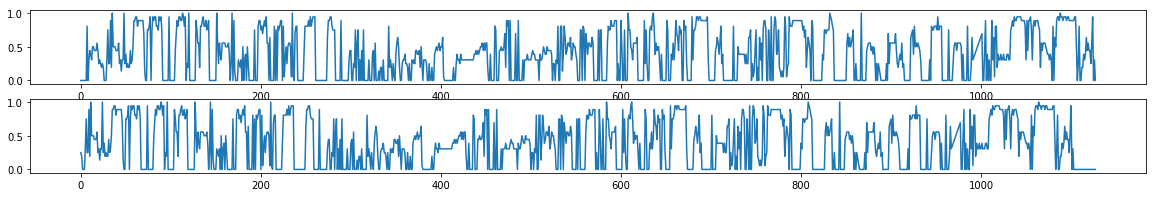

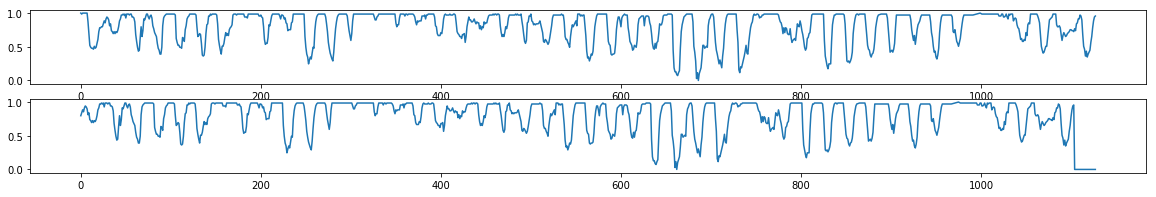

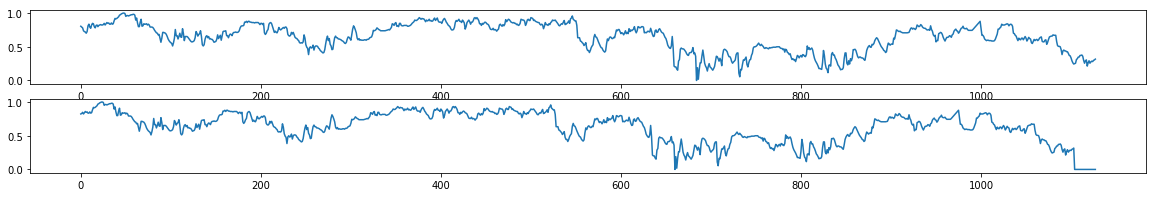

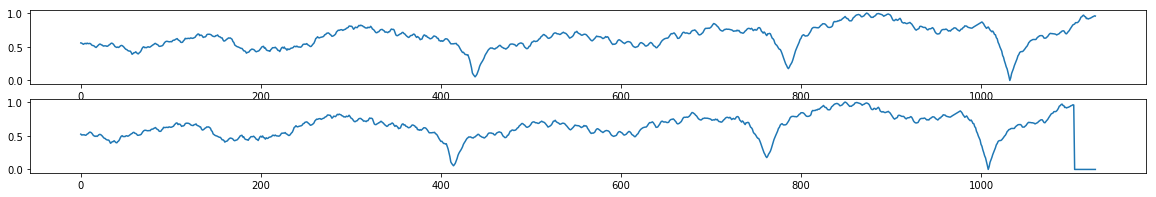

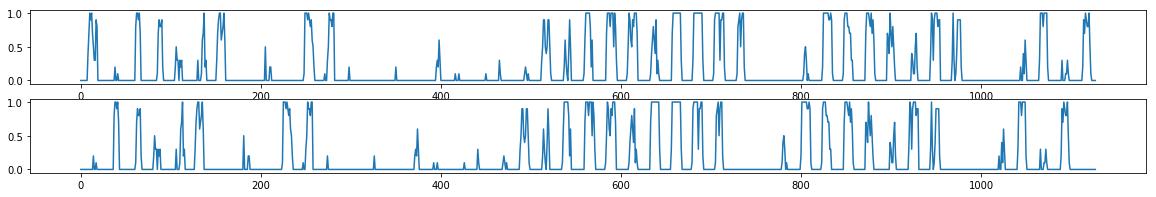

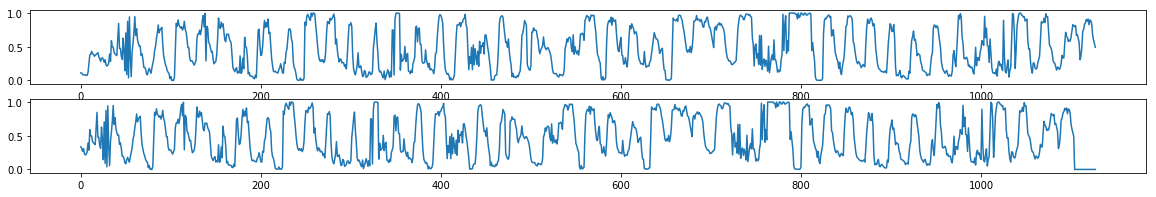

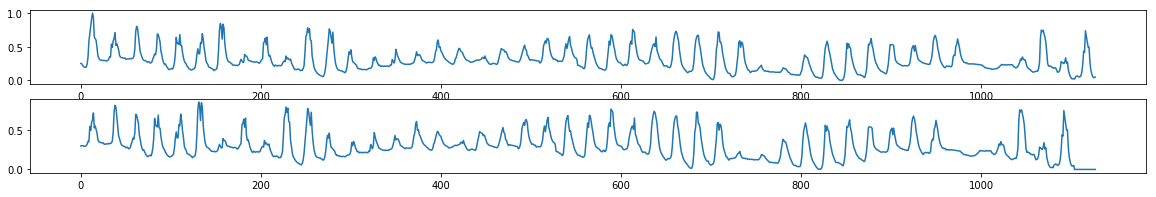

In [6]:
'''w=get_weather()
for i in range(w.shape[1]//2):
    fig=plt.figure(figsize=(20,3))
    fig.add_subplot(2,1,1).plot(w[:,i])
    fig.add_subplot(2,1,2).plot(w[:,i+w.shape[1]//2])
plt.show()'''

C:\Users\vislab_shs\Anaconda3\envs\gluon\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


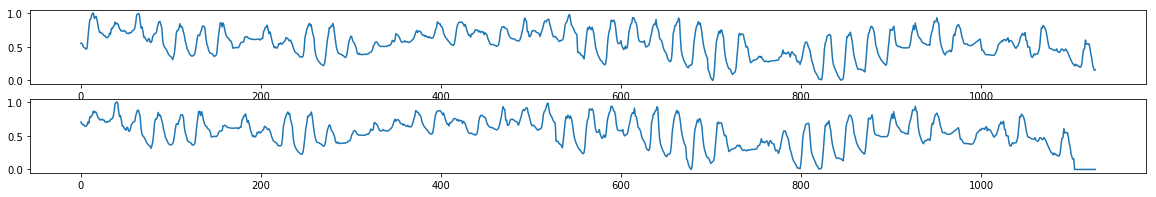

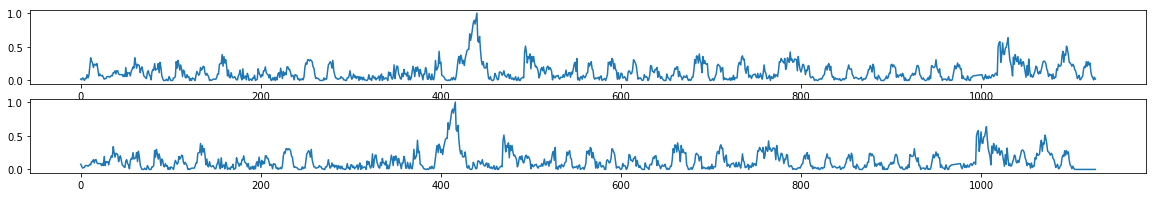

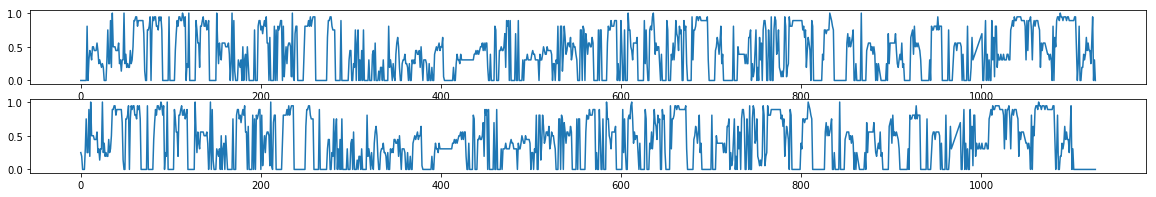

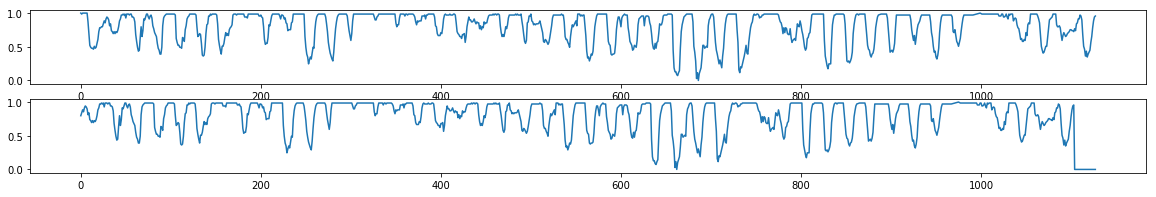

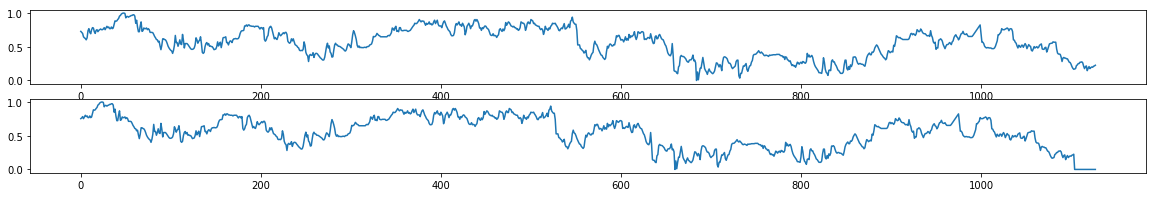

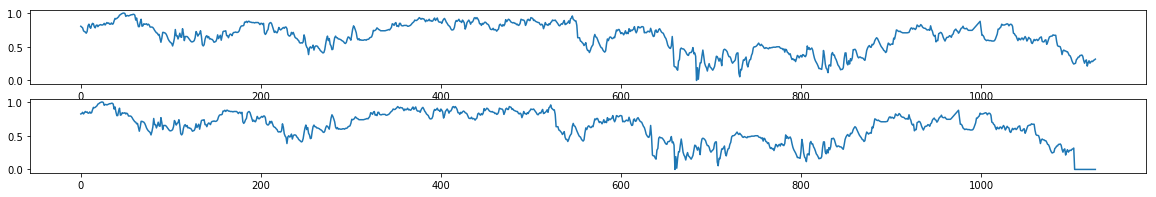

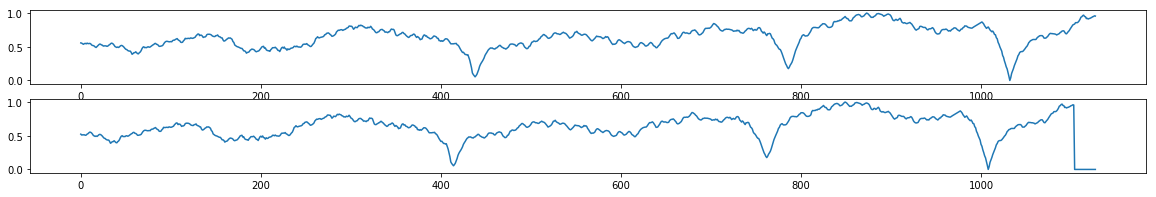

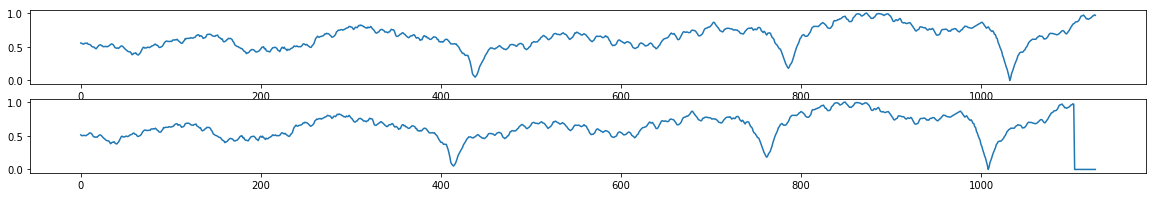

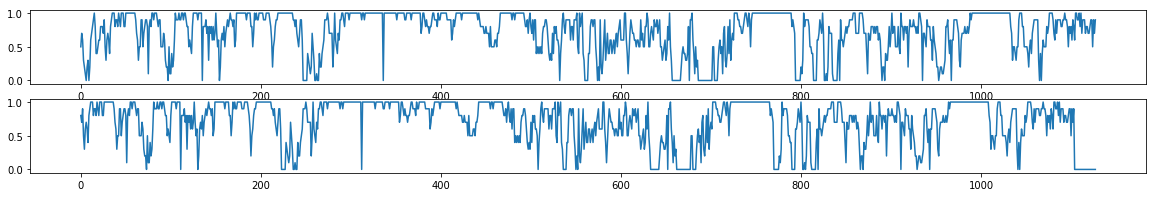

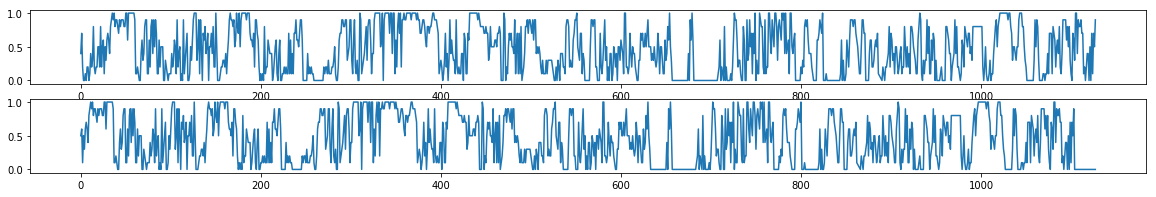

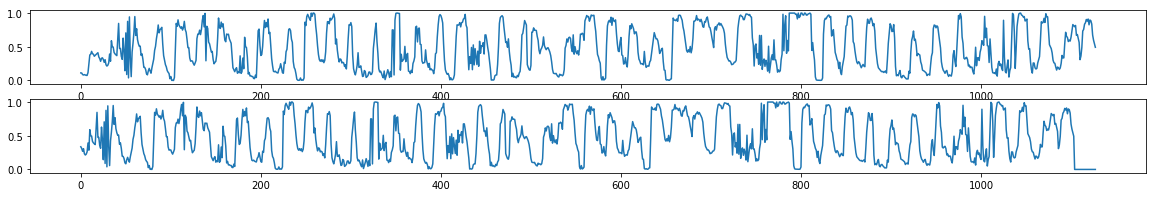

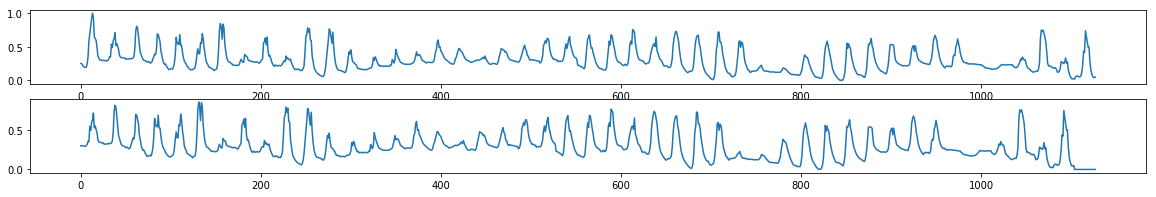

In [36]:
'''
w=get_weather()
for i in range(w.shape[1]//2):
    fig=plt.figure(figsize=(20,3))
    fig.add_subplot(2,1,1).plot(w[:,i])
    fig.add_subplot(2,1,2).plot(w[:,i+w.shape[1]//2])'''

C:\Users\vislab_shs\Anaconda3\envs\gluon\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


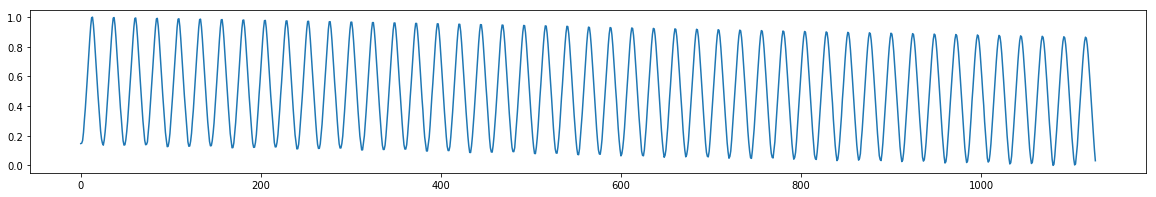

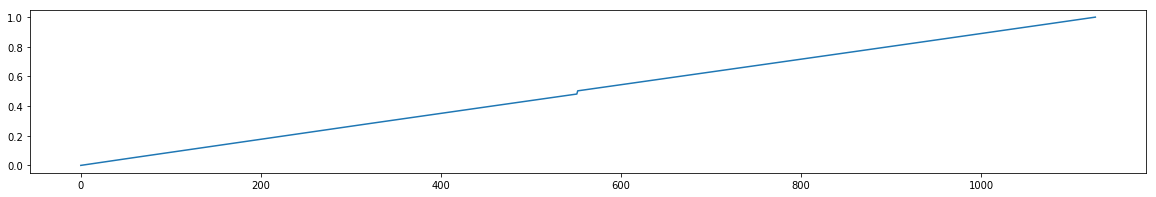

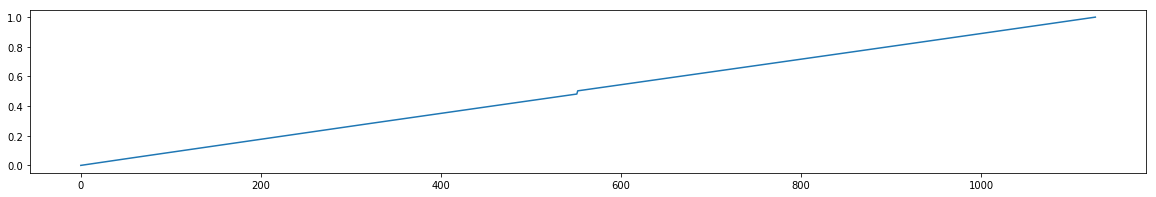

In [47]:
'''s=get_sun()
for i in range(s.shape[1]):
    fig=plt.figure(figsize=(20,3))
    fig.add_subplot(1,1,1).plot(s[:,i])'''

C:\Users\vislab_shs\Anaconda3\envs\gluon\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


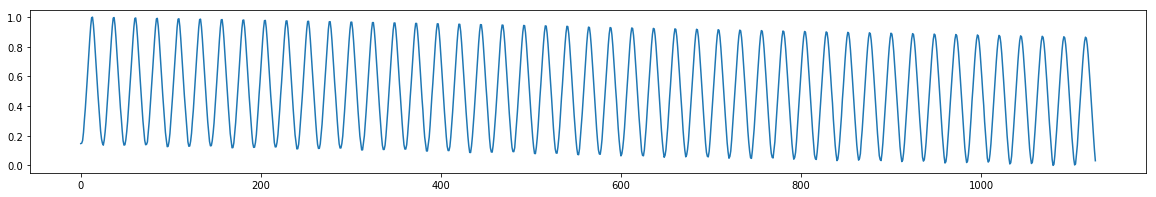

In [51]:
'''s=get_sun()
for i in range(s.shape[1]):
    fig=plt.figure(figsize=(20,3))
    fig.add_subplot(1,1,1).plot(s[:,i])'''

In [14]:
def get_data(k2):
    n_steps_in=24*3
    n_steps_out=24
    n_step=n_steps_in

    fnames=pd.read_table('data/names_72.txt',header=None)
    fnames=fnames.values[:,0]
    fnames= [fn.replace('json','csv') for fn in fnames]

    #idx
    idx=np.array([ 7,  9,  4,  8, 11,  1, 10,  3,  5,  2,  6, 12])
    idx=idx[:k2]

    #weather data
    data_w=get_weather(idx[idx<11]-1)
    #sun data
    data_sun=get_sun(idx[idx>=11]-11)

    data_hr1=[]
    for fn in fnames:
        data_hr1.append(pd.read_csv('data/cv_26/'+fn).values[:,0])
    data_hr1=np.array(data_hr1)
    data_hr1=np.concatenate((data_hr1,np.zeros((47,1))),axis=1)

    #faltten
    data_hr1=data_hr1.reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)
    clip=24*6
    data_hr1=data_hr1[:-clip]
    # Feature Scaling
    sc1 = MinMaxScaler(feature_range = (0, 1))
    data_hr_scaled1 = sc1.fit_transform(data_hr1)
    data_hr_scaled1.shape,np.min(data_hr_scaled1),np.max(data_hr_scaled1)

    #merge
    dataset_scaled1=np.concatenate((data_hr_scaled1,data_w[:-clip],data_sun[:-clip]),axis=-1)

    n_features=dataset_scaled1.shape[1]
    #train / test split
    n_train=len(dataset_scaled1)-24*10
    n_test=len(dataset_scaled1)-n_train
    training_set_scaled1=dataset_scaled1[:n_train]
    test_set_scaled1=dataset_scaled1[n_train:]

    #input/output
    X_train = []
    y_train = []
    for i in range(n_step,22*24-24):
        X_train.append(training_set_scaled1[i-n_step:i])
        y_train.append(training_set_scaled1[i:i+24])
    for i in range(22*24+n_step,n_train-24):
        X_train.append(training_set_scaled1[i-n_step:i])
        y_train.append(training_set_scaled1[i:i+24])
    X_train, y_train = np.array(X_train), np.array(y_train)
    # Reshaping
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))
    y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], n_features))

    X_test = []
    y_test=[]
    for i in range(n_step, n_test-24+1,24):
        X_test.append(test_set_scaled1[i-n_step:i])
        y_test.append(test_set_scaled1[i:i+24])
    X_test,y_test = np.array(X_test),np.array(y_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))
    y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], n_features))

    return X_train,y_train,X_test,y_test,data_hr1,sc1

def getting_data(k2):
    
    n_steps_in=24*3
    n_steps_out=24
    n_step=n_steps_in

    fnames=pd.read_table('data/names_72.txt',header=None)
    fnames=fnames.values[:,0]
    fnames= [fn.replace('json','csv') for fn in fnames]

    #weather data
    data_w=get_weather(k=k2)
    #sun data
    data_sun=get_sun()
    #air data
    #ata_a=get_air()#10
    #y data
    data_hr1=[]
    for fn in fnames:
        data_hr1.append(pd.read_csv('data/cv_26/'+fn).values[:,0])
    data_hr1=np.array(data_hr1)
    data_hr1=np.concatenate((data_hr1,np.zeros((47,1))),axis=1)
    #faltten
    data_hr1=data_hr1.reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)
    clip=24*6
    data_hr1=data_hr1[:-clip]
    # Feature Scaling
    sc1 = MinMaxScaler(feature_range = (0, 1))
    data_hr_scaled1 = sc1.fit_transform(data_hr1)
    data_hr_scaled1.shape,np.min(data_hr_scaled1),np.max(data_hr_scaled1)
    #merge
    dataset_scaled1=np.concatenate((data_hr_scaled1,data_w[:-clip],data_sun[:-clip]),axis=-1)
    #select
    #idx=[8,10,5,9,1,4,3,6,2,7]
    #dataset_scaled1=dataset_scaled1[:,idx[:k]]
    n_features=dataset_scaled1.shape[1]
    
    #train / test split
    n_train=len(dataset_scaled1)-24*10
    n_test=len(dataset_scaled1)-n_train
    training_set_scaled1=dataset_scaled1[:n_train]
    test_set_scaled1=dataset_scaled1[n_train:]
    #print(training_set_scaled1.shape,test_set_scaled1.shape)
    #input/output
    X_train = []
    y_train = []
    for i in range(n_step,22*24-24):
        X_train.append(training_set_scaled1[i-n_step:i])
        y_train.append(training_set_scaled1[i:i+24])
    for i in range(22*24+n_step,n_train-24):
        X_train.append(training_set_scaled1[i-n_step:i])
        y_train.append(training_set_scaled1[i:i+24])
    X_train, y_train = np.array(X_train), np.array(y_train)
    # Reshaping
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))
    y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], n_features))
    #print("train",X_train.shape,y_train.shape)#(960, 168, 1),(960,)

    X_test = []
    y_test=[]
    for i in range(n_step, n_test-24+1,24):
        X_test.append(test_set_scaled1[i-n_step:i])
        y_test.append(test_set_scaled1[i:i+24])
    X_test,y_test = np.array(X_test),np.array(y_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))
    y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], n_features))
    
    return X_train,y_train,X_test,y_test,data_hr1,sc1